# Coursework 1: Image filtering

In this coursework we will explore some basic image filters used in computer vision. The corresponding lectures are Lectures 3 and 4 on image filtering and edge detection.

What to do?

* The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are supposed to implement.

* First, run `jupyter-lab` or `jupyter-notebook` in the terminal to start the Jupyter notebook.

* Then, complete and run the code to get the results.

* Finally, please export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and answers, and upload the pdf file onto Cate.

Dependencies:

* If you work on a college computer in the Computer Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where required Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_2020/bin/activate`

When you no longer need the virtual environment, you can exit it by running `deactivate`.

* If you work on your own laptop using either Anaconda or plain Python, you can install new packages (such as numpy, imageio etc) running `conda install [package_name]` or `pip3 install [package_name]` in the terminal.




In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

### 1. Moving average filter. (20 points)

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Apply the filter to the input image, show the filtering results and comment on the results.

Design the kernel of the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

Image dimension = (1800, 2400)


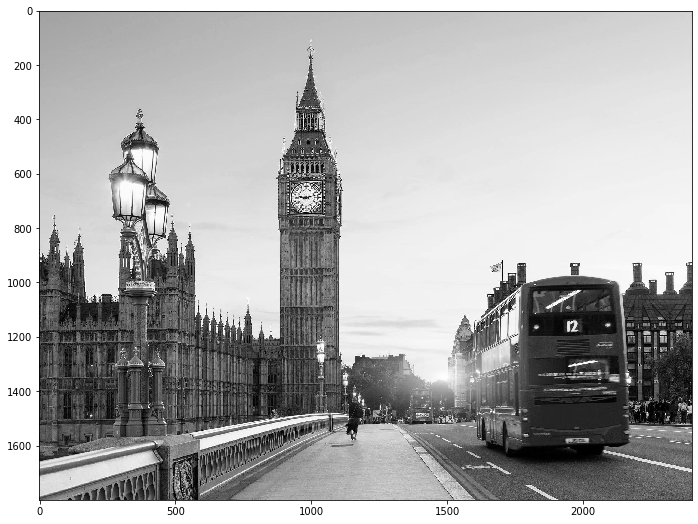

In [2]:
# Read the image (provided)
image = imageio.imread('london.jpg')
print('Image dimension =', image.shape)
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(12, 9)

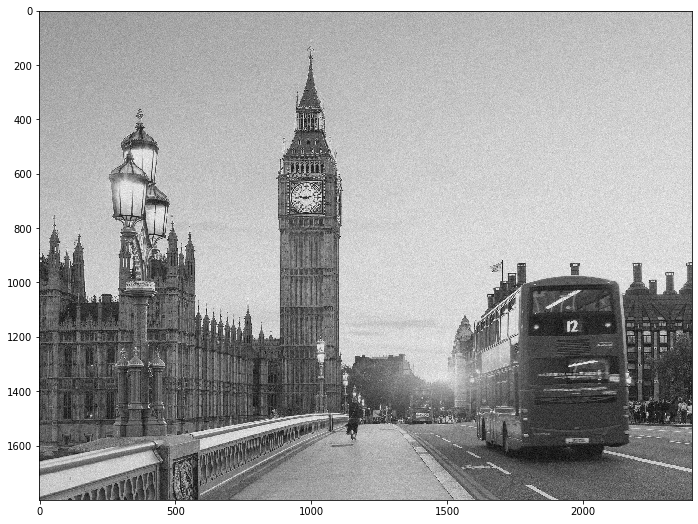

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(12, 9)

**Note: from now on, please use the noisy image as the input for the filters.**

### 1.1 Filter the noisy image with a 3x3 moving average filter. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


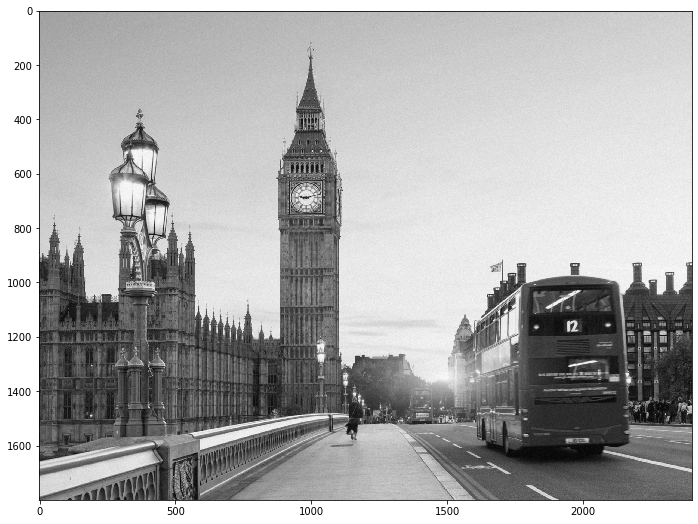

In [4]:
# Design the filter h
h = np.ones((3,3), dtype = int)/9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, boundary='symm', mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.2 Filter the noisy image with a 5x5 moving average filter. (5 points)

Filter h:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


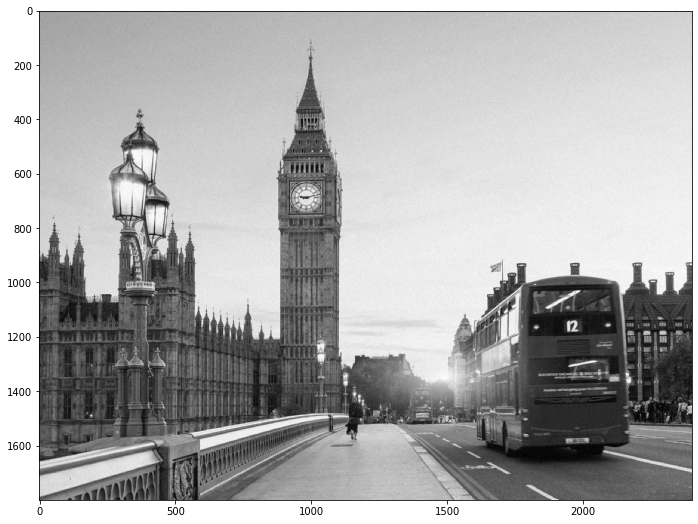

In [5]:
# Design the filter h
h = np.ones((5,5), dtype = int)/5**2

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, boundary='symm', mode='same')


# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.3 Filter the noisy image with a 9x9 moving average filter. (5 points)

Filter h:
[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


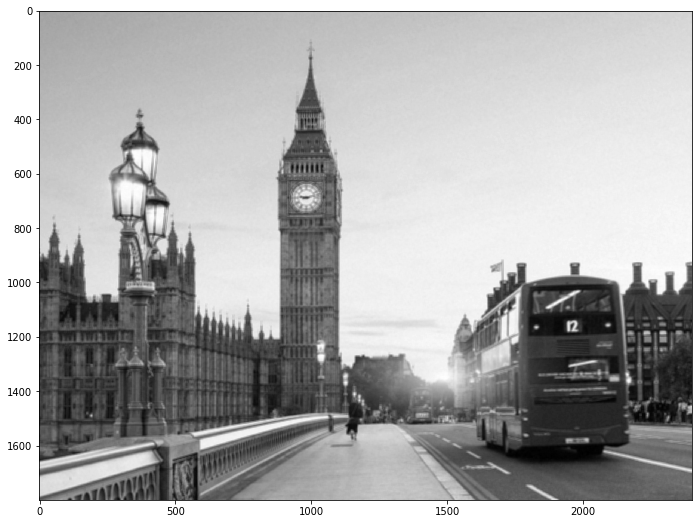

In [6]:
# Design the filter h
h = np.ones((9,9), dtype = int)/9**2

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, boundary='symm', mode='same')



# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.4 Comment on the filtering results. How do different kernel sizes influence the filtering results? (5 points)

From the resulting images above, it can be seen that the larger the moving average filter kernel size, the more smooth but blurry the image becomes. This is due to the removal of high frequency signal (noise or sharpness) in the image.


### 2. Edge detection. (45 points)

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the magnitude image of the Sobel filtering result and comment.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (5 points)

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


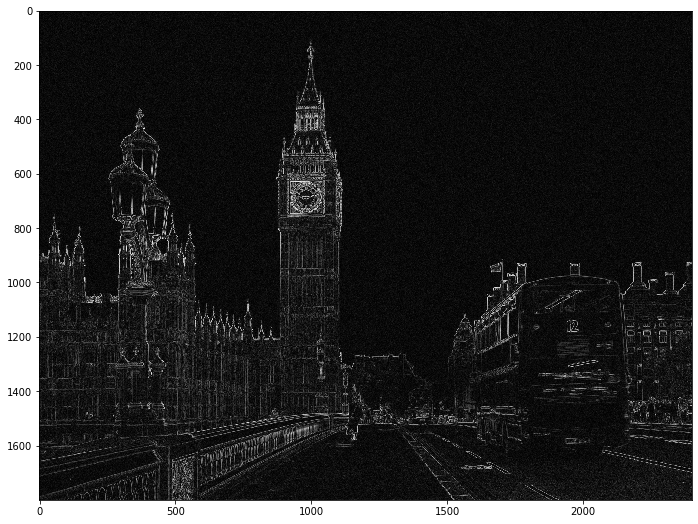

In [7]:
# Design the Sobel filters
h_sobel_x = np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])

h_sobel_y = np.array([[ 1,  2,  1],
                      [ 0,  0,  0],
                      [-1, -2, -1]])

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_noisy, h_sobel_x, boundary='symm', mode='same')
sobel_y = scipy.signal.convolve2d(image_noisy, h_sobel_y, boundary='symm', mode='same')

# Calculate the gradient magnitude     
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
        

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 2.2 Design a 2D Gaussian filter. (8 points)

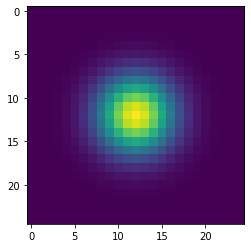

In [8]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    k = 4
    filter_size = 2*k*sigma + 1
    x, y = np.meshgrid(np.linspace(-k*sigma,k*sigma,filter_size), np.linspace(-k*sigma,k*sigma,filter_size))
    d = np.sqrt(x*x+y*y)
    h = np.exp( -( (d)**2 / ( 2.0 * sigma**2 ) ) )    
    h = 1/(2*math.pi*sigma**2)*h
    
    # return: a 2D array for the Gaussian kernel
    return h 

# Display the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering. (5 points)

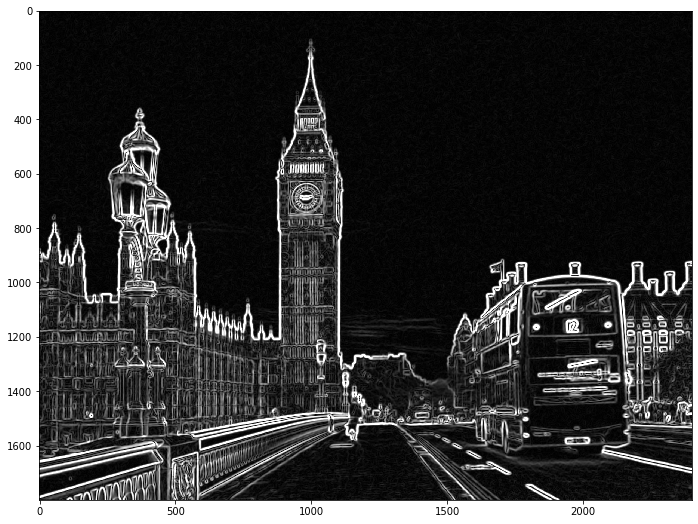

In [9]:
# Perform Gaussian smoothing before Sobel filtering
image_gauss = scipy.signal.convolve2d(image_noisy, h, boundary='symm', mode='same')

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_gauss, h_sobel_x, boundary='symm', mode='same')
sobel_y = scipy.signal.convolve2d(image_gauss, h_sobel_y, boundary='symm', mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)


# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels), followed by Sobel filtering. Evaluate the computational time for Gaussian smoothing. (7 points)

Gaussian Smoothing computational time: 43.5 seconds


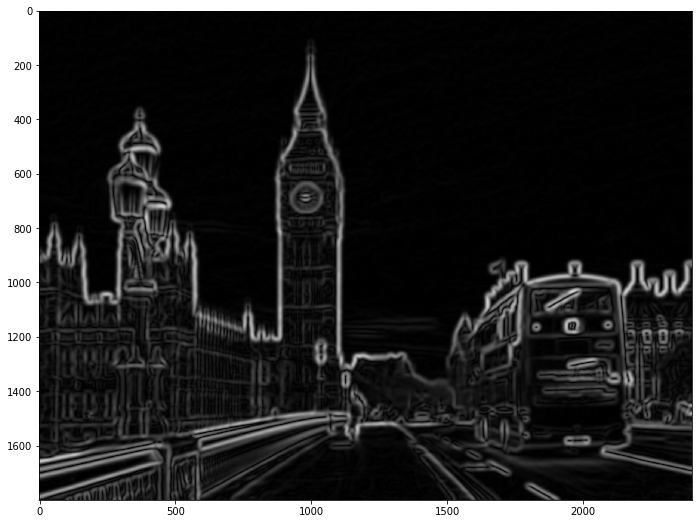

In [10]:
# Create the Gaussian filter
h_gaus = gaussian_filter_2d(7)

# Perform Gaussian smoothing (and evaluate time)
import time
start_time = time.time()

image_gauss = scipy.signal.convolve2d(image_noisy, h_gaus, boundary='symm', mode='same')

print("Gaussian Smoothing computational time: %.4s seconds" % (time.time() - start_time))


# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_gauss, h_sobel_x, boundary='symm', mode='same')
sobel_y = scipy.signal.convolve2d(image_gauss, h_sobel_y, boundary='symm', mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (8 points)

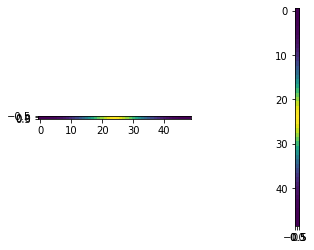

In [11]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    k = 3.5
    filter_size = 2*k*sigma
    
    x = np.linspace(-k*sigma,k*sigma,filter_size)
    d = -((x**2)/(2*(sigma**2)))
    h = (1/(math.sqrt(2*math.pi)*sigma))*np.exp(d)
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.expand_dims(gaussian_filter_1d(sigma), axis = 0)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.expand_dims(gaussian_filter_1d(sigma), axis = 1)

# Display the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (7 points)

Separable Gaussian filtering computational time: 2.28 seconds


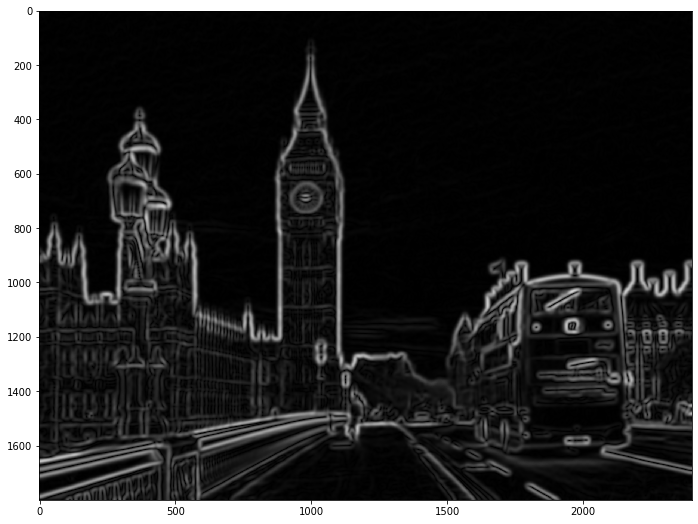

In [12]:
import time #import time library
start_time = time.time() #start timer

# Perform separable Gaussian smoothing before Sobel filtering
image_gauss = scipy.signal.convolve2d(image_noisy, h_x, boundary='symm', mode='same')
image_gauss = scipy.signal.convolve2d(image_gauss, h_y, boundary='symm', mode='same')

#print computation time
print("Separable Gaussian filtering computational time: %.4s seconds" % (time.time() - start_time))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_gauss, h_sobel_x, boundary='symm', mode='same')
sobel_y = scipy.signal.convolve2d(image_gauss, h_sobel_y, boundary='symm', mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (5 points)

When sobel filters are applied with no gaussian smoothing, it can be seen that the edges are detected. However because there is a lot of noise, the edges are not as prominent. When gaussian filtering is applied first and then sobel filtering, we can see that because gaussian smoothing has removed all the high frequency signal, the edge lines are much more prominent.

Computational time of applying two separable Gaussian 1D filters is significantly less than applying a Gaussian 2D filter (approximately 2s vs 44s). This is due to the computational complexity for the latter being $K^2*N^2$ compared to computational complexity of $K*N^2$ for the former (where $K$ is the size of the filter and $N$ is the size of the image).


### 3. Laplacian filter. (20 points)

Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

### 3.1 Implement a 3x3 Laplacian filter. (5 points)

h:
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


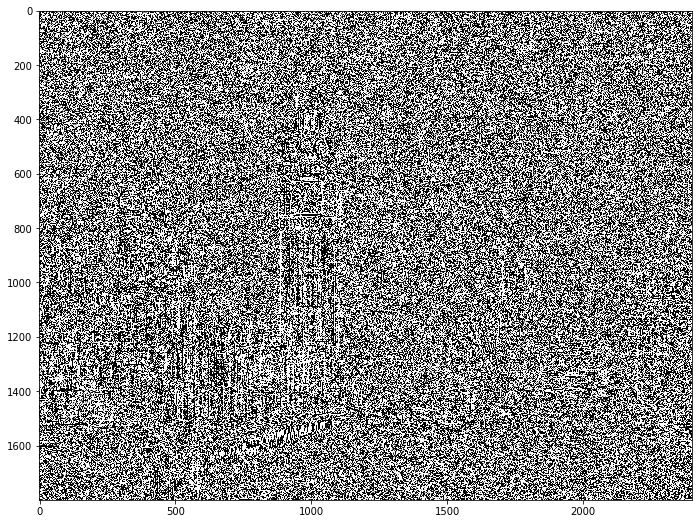

In [13]:
# Design the filter
h = np.array([[0, 1, 0], [1,-4, 1], [0, 1, 0]])

# Laplacian filtering
lap = scipy.signal.convolve2d(image_noisy, h, boundary='symm', mode='same')


# Print the filter (provided)
print('h:')
print(h)

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel). (10 points)

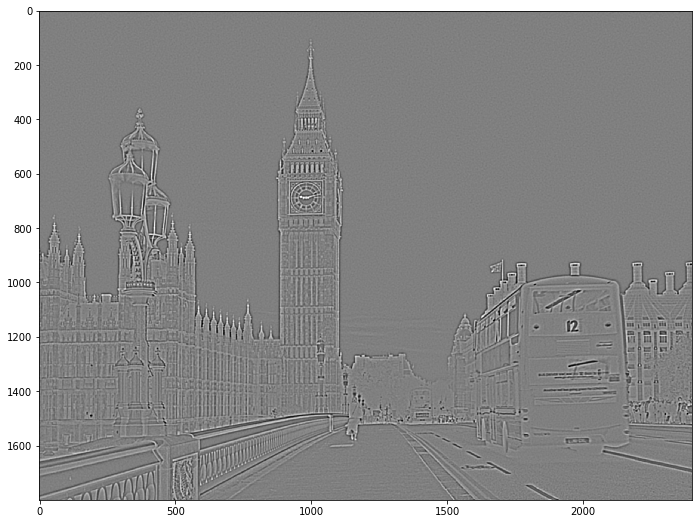

In [14]:
# Design the Gaussian filters
sigma = 3

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.expand_dims(gaussian_filter_1d(sigma), axis = 0)


# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.expand_dims(gaussian_filter_1d(sigma), axis = 1)


# Gaussian smoothing
image_gauss = scipy.signal.convolve2d(image_noisy, h_x, boundary='symm', mode='same')
image_gauss = scipy.signal.convolve2d(image_gauss, h_y, boundary='symm', mode='same')


# Design the Laplacian filter
h = np.array([[0, 1, 0], [1,-4, 1], [0, 1, 0]])

# Laplacian filtering
lap = scipy.signal.convolve2d(image_gauss, h, boundary='symm', mode='same')


# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.3 Comments on the filtering results. (5 points)

The second derivative is even more sensitive to noise and it is used to define the Laplacian filter. Because it is so sensitive to noise, when Laplacian filter is applied with no smoothing beforehands, then the image (3.1) produced has a lot of noise and it is hard to see any patterns in that image. However, once Gaussian smoothing has taken place and Laplacian filter has been applied edges can be clearly seen on the image (3.2).

### 4. Exploration: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [15]:
# Import libaries (provided)
import torch

### 4.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [16]:
# Expand the dimension of the numpy array
x = image_noisy[np.newaxis][np.newaxis]

# Convert to a Pytorch tensor using torch.from_numpy
image_torch = torch.from_numpy(x)

### 4.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [17]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
size = 3
conv.weight.data.fill_(1/size**2)

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])

### 4.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

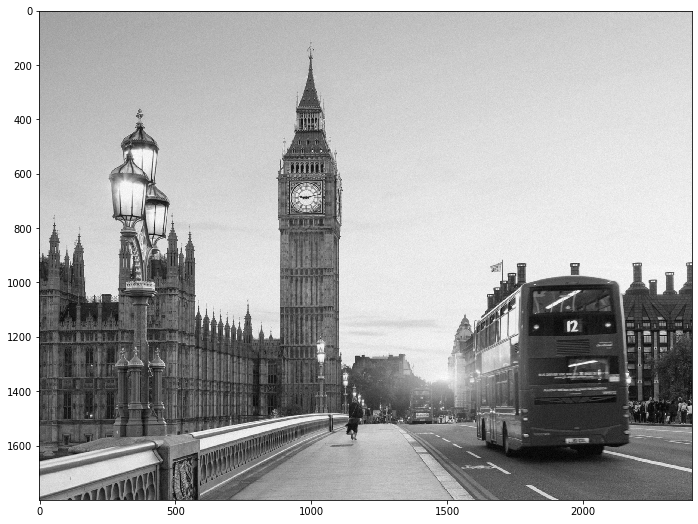

In [18]:
# Filtering
image_filtered = conv(image_torch.float()).detach().numpy()
image_filtered = image_filtered[0,0,:,:]

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 5. Survey: How many hours does it take you to complete the coursework?

10hrs